<a href="https://colab.research.google.com/github/xenidegracia/DataVizClassNotes/blob/main/DataWrangle2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INFO 526
##Data Wrangling 2
###Fall 2024

Data: Hotel bookings

Data from two hotels: one resort and one city hotel

Observations: Each row represents a hotel booking

###First, the Setup:

In [ ]:
# load packages
if(!require(pacman))
  install.packages("pacman")

pacman::p_load(countdown,
               tidyverse,
               glue,
               scales,
               ggthemes)

# set theme for ggplot2
ggplot2::theme_set(ggplot2::theme_minimal(base_size = 14))


###Load our data

In [ ]:
hotels <- read.csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-11/hotels.csv")
head(hotels)

# View readme here: https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-11/readme.md

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,⋯,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>
1,Resort Hotel,0,342,2015,July,27,1,0,0,2,⋯,No Deposit,NULL,NULL,0,Transient,0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,737,2015,July,27,1,0,0,2,⋯,No Deposit,NULL,NULL,0,Transient,0,0,0,Check-Out,2015-07-01
3,Resort Hotel,0,7,2015,July,27,1,0,1,1,⋯,No Deposit,NULL,NULL,0,Transient,75,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,13,2015,July,27,1,0,1,1,⋯,No Deposit,304,NULL,0,Transient,75,0,0,Check-Out,2015-07-02
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,⋯,No Deposit,240,NULL,0,Transient,98,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,14,2015,July,27,1,0,2,2,⋯,No Deposit,240,NULL,0,Transient,98,0,1,Check-Out,2015-07-03


##Scenario 1

We have a single data frame and we want to slice it, and dice it, and process it, so we can plot it

In [ ]:
hotels <- hotels |>
  mutate(
    arrival_date_month = fct_relevel(arrival_date_month, month.name),
    season = case_when(
      arrival_date_month %in% c("December", "January", "February") ~ "Winter",
      arrival_date_month %in% c("March", "April", "May") ~ "Spring",
      arrival_date_month %in% c("June", "July", "August") ~ "Summer",
      TRUE ~ "Fall"
    ),
    season = fct_relevel(season, "Winter", "Spring", "Summer", "Fall")
  )
  head(hotels)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,⋯,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,season
,<chr>,<int>,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,⋯,<chr>,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<fct>
1,Resort Hotel,0,342,2015,July,27,1,0,0,2,⋯,NULL,NULL,0,Transient,0,0,0,Check-Out,2015-07-01,Summer
2,Resort Hotel,0,737,2015,July,27,1,0,0,2,⋯,NULL,NULL,0,Transient,0,0,0,Check-Out,2015-07-01,Summer
3,Resort Hotel,0,7,2015,July,27,1,0,1,1,⋯,NULL,NULL,0,Transient,75,0,0,Check-Out,2015-07-02,Summer
4,Resort Hotel,0,13,2015,July,27,1,0,1,1,⋯,304,NULL,0,Transient,75,0,0,Check-Out,2015-07-02,Summer
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,⋯,240,NULL,0,Transient,98,0,1,Check-Out,2015-07-03,Summer
6,Resort Hotel,0,14,2015,July,27,1,0,2,2,⋯,240,NULL,0,Transient,98,0,1,Check-Out,2015-07-03,Summer


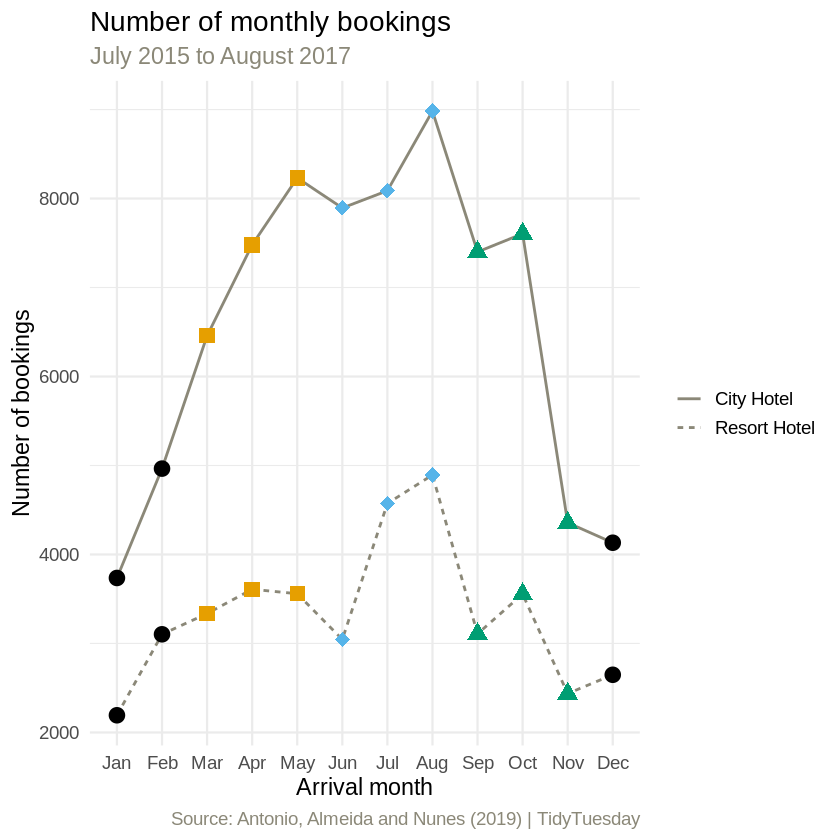

In [ ]:
#| label: monthly-bookings
#| fig-asp: 0.5
#| echo: false

hotels |>

  count(season, hotel, arrival_date_month) |>

  ggplot(aes(x = arrival_date_month, y = n, group = hotel, linetype = hotel)) +
  geom_line(linewidth = 0.8, color = "cornsilk4") +
  geom_point(aes(shape = season, color = season), size = 4, show.legend = FALSE) +
  scale_x_discrete(labels = month.abb) +
  scale_color_colorblind() +
  scale_shape_manual(values = c("circle", "square", "diamond", "triangle")) +
  labs(
    x = "Arrival month", y = "Number of bookings", linetype = NULL,
    title = "Number of monthly bookings",
    subtitle = "July 2015 to August 2017",
    caption = "Source: Antonio, Almeida and Nunes (2019) | TidyTuesday"
  ) +
  coord_cartesian(clip = "off") +
  theme(
    legend.position.inside = c(0.12, 0.9),
    legend.box.background = element_rect(fill = "white", color = "white"),
    plot.subtitle = element_text(color = "cornsilk4"),
    plot.caption = element_text(color = "cornsilk4")
  )

##Rowwise operations

In [ ]:
hotels |>
  select(adults, children, babies) |>
  mutate(guests = sum(c(adults, children, babies)))

adults,children,babies,guests
<int>,<int>,<int>,<int>
2,0,0,NA
2,0,0,NA
1,0,0,NA
1,0,0,NA
2,0,0,NA
2,0,0,NA
2,0,0,NA
2,0,0,NA
2,0,0,NA


In [ ]:
hotels |>
  select(adults, children, babies) |>
  rowwise() |>
  mutate(guests = sum(c(adults, children, babies))) |>
  filter(adults > 0, children > 0, babies > 0) # to show sum works

adults,children,babies,guests
<int>,<int>,<int>,<int>
2,1,1,4
2,1,1,4
2,1,1,4
2,1,1,4
2,1,1,4
2,1,1,4
2,1,1,4
2,2,1,5
2,2,1,5


##Columnwise operations

In [ ]:
hotels |>
  summarise(across(.cols = starts_with("stays"),  mean))

stays_in_weekend_nights,stays_in_week_nights
<dbl>,<dbl>
0.9275986,2.500302


In [ ]:
hotels |>
  summarise(across(.cols = starts_with("stays"),  list(mean, sd)))

stays_in_weekend_nights_1,stays_in_weekend_nights_2,stays_in_week_nights_1,stays_in_week_nights_2
<dbl>,<dbl>,<dbl>,<dbl>
0.9275986,0.9986135,2.500302,1.908286


In [ ]:
hotels |>
  group_by(hotel, is_canceled) |>
  summarise(
    across(.cols = starts_with("stays"),  list(mean = mean, sd = sd), .names = "{.fn}_{.col}")
    )

`summarise()` has grouped output by 'hotel'. You can override
using the `.groups` argument.


hotel,is_canceled,mean_stays_in_weekend_nights,sd_stays_in_weekend_nights,mean_stays_in_week_nights,sd_stays_in_week_nights
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
City Hotel,0,0.8006836,0.8615080,2.122934,1.400799
City Hotel,1,0.7875053,0.9168195,2.266781,1.526787
Resort Hotel,0,1.1339070,1.1442298,3.008985,2.450714
Resort Hotel,1,1.3352814,1.1444040,3.440299,2.461699


In [ ]:
hotels_summary <- hotels |>
  group_by(hotel, is_canceled) |>
  summarise(
    across(
      .cols = starts_with("stays"),
      list(mean = mean),
      .names = "{.fn}_{.col}"
    ),
    .groups = "drop"
  )

hotels_summary

hotel,is_canceled,mean_stays_in_weekend_nights,mean_stays_in_week_nights
<chr>,<int>,<dbl>,<dbl>
City Hotel,0,0.8006836,2.122934
City Hotel,1,0.7875053,2.266781
Resort Hotel,0,1.1339070,3.008985
Resort Hotel,1,1.3352814,3.440299


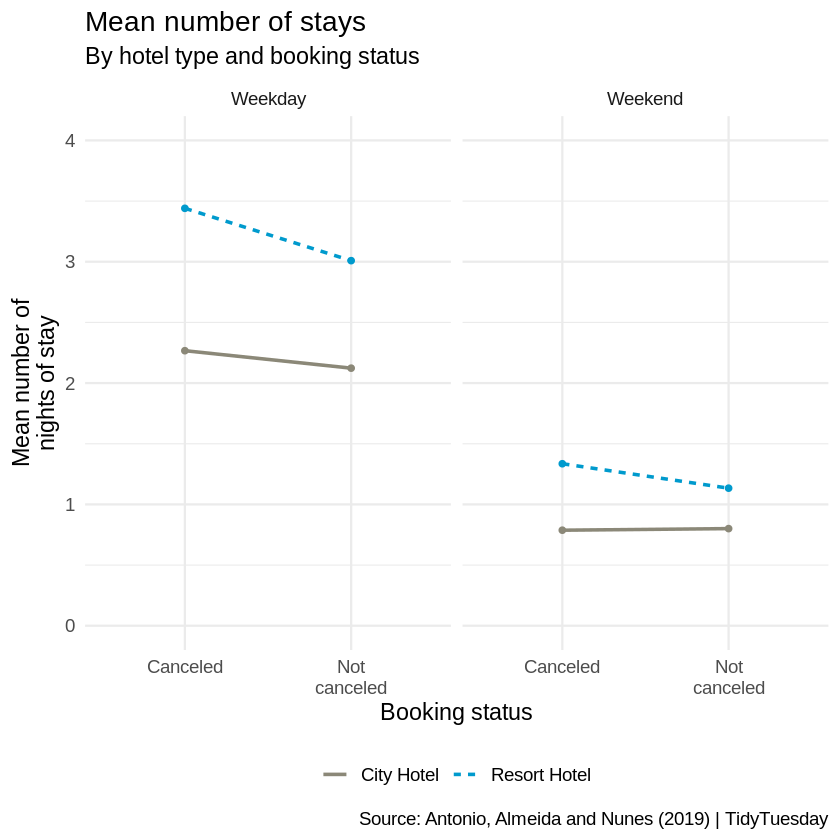

In [ ]:
hotels_summary |>
  mutate(is_canceled = if_else(is_canceled == 0, "Not canceled", "Canceled")) |>
  pivot_longer(cols = starts_with("mean"),
               names_to = "day_type",
               values_to = "mean_stays",
               names_prefix = "mean_stays_in_") |>
  mutate(
    day_type = if_else(str_detect(day_type, "weekend"), "Weekend", "Weekday")
    ) |>
  ggplot(aes(x = str_wrap(is_canceled, 10), y = mean_stays,
             group = hotel, color = hotel)) +
  geom_point(show.legend = FALSE) +
  geom_line(aes(linetype = hotel), linewidth = 1) +
  facet_wrap(~day_type) +
  labs(
    x = "Booking status",
    y = "Mean number of\nnights of stay",
    color = NULL, linetype = NULL,
    title = "Mean number of stays",
    subtitle = "By hotel type and booking status",
    caption = "Source: Antonio, Almeida and Nunes (2019) | TidyTuesday"
  ) +
  scale_color_manual(values = c("cornsilk4", "deepskyblue3")) +
  scale_y_continuous(limits = c(0, 4), breaks = 0:4) +
  theme(legend.position = "bottom")

##Stats
Layering with Stats

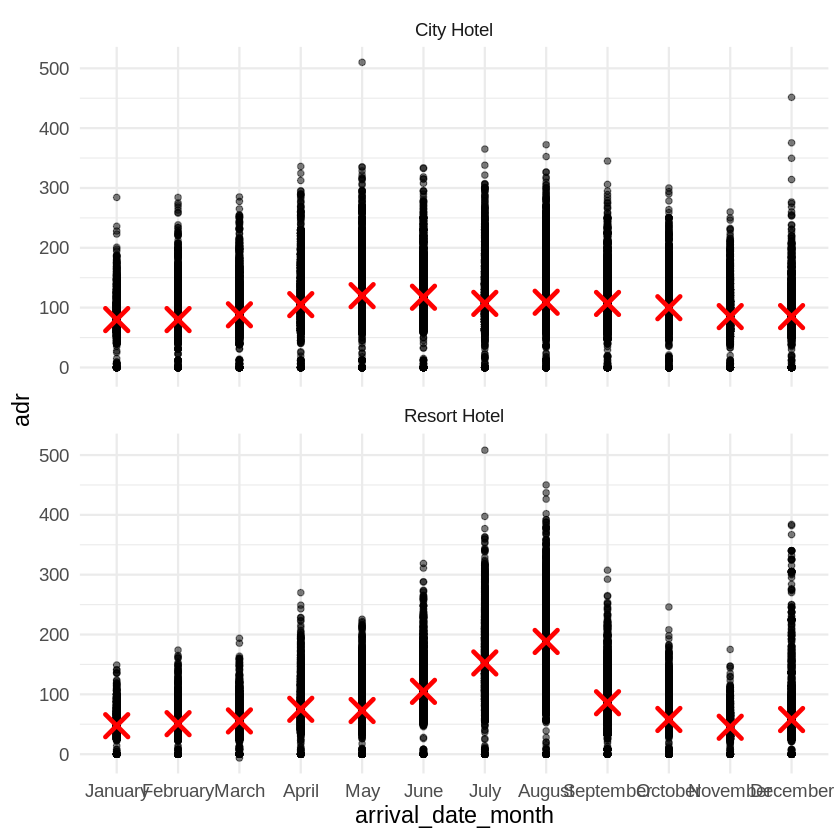

In [ ]:
hotels |>
  filter(adr < 4000) |>
  ggplot(aes(x = arrival_date_month, y = adr)) +
  geom_point(alpha = 0.5) +
  stat_summary(
    geom = "point", fun = "median",
    colour = "red", size = 5, pch = 4, stroke = 2
  ) +
  facet_wrap(~ hotel, ncol = 1)

###Statistical Transformations

What can you say about the distribution of price from the following QQ plot?

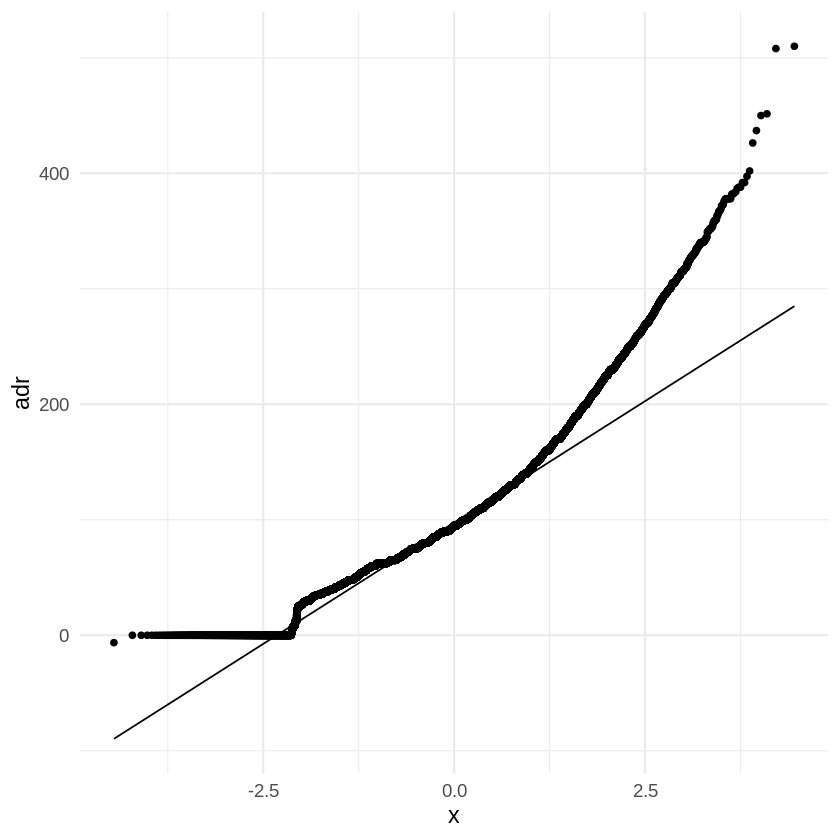

In [ ]:
hotels |>
  filter(adr < 4000) |>
  ggplot(aes(sample = adr)) +
  stat_qq() +
  stat_qq_line() +
  labs(y = "adr")